In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0, np.newaxis]
y = data[:, 1, np.newaxis]
m = len(y)
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

Text(0.5, 0, 'Population of City in 10,000s')

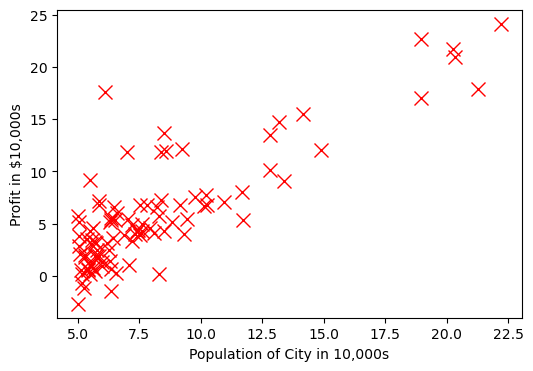

In [4]:
fig1, ax = plt.subplots(figsize=(6, 4))
ax.plot(X, y, 'rx', markersize=10)
ax.set_ylabel('Profit in $10,000s')
ax.set_xlabel('Population of City in 10,000s')

In [5]:
X = np.concatenate((np.ones((m, 1)), X), axis=1)
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01

In [6]:
def computeCost(X, y, theta):
	h = X @ theta
	J = np.sum(np.power(h - y, 2)) / (2 * m)
	return J

In [7]:
computeCost(X, y, theta)

32.072733877455676

In [8]:
computeCost(X, y, np.array([[-1], [2]]))

54.24245508201238

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
	m = np.size(y, 0)
	J_history = np.zeros(num_iters)

	for iter in range(num_iters):
		temp0 = theta[0, 0] - alpha / m * np.sum((X @ theta - y) * X[:, 0, np.newaxis])
		temp1 = theta[1, 0] - alpha / m * np.sum((X @ theta - y) * X[:, 1, np.newaxis])
		theta[0, 0] = temp0
		theta[1, 0] = temp1

		J_history[iter] = computeCost(X, y, theta)

	return theta, J_history

In [10]:
theta, cost = gradientDescent(X, y, theta, alpha, iterations)

print('Theta computed from gradient descent:\n{0},\n{1}'.format(*theta[0], *theta[1]))

Theta computed from gradient descent:
-3.6302914394043597,
1.166362350335582


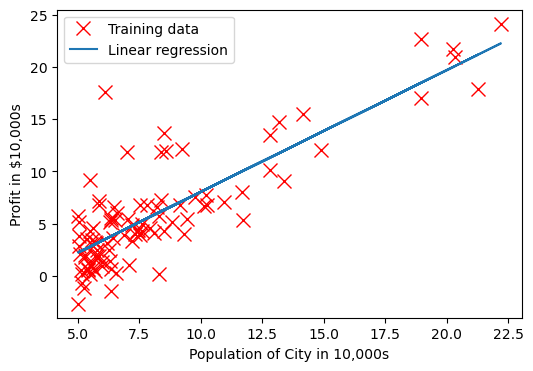

In [11]:
ax.plot(X[:, 1], X @ theta, '-')
ax.legend(['Training data', 'Linear regression'])
fig1

In [12]:
predict1 = np.array([1, 3.5]) @ theta
print('For population = 35,000, we predict a profit of {}'.format(*predict1 * 10000))

For population = 35,000, we predict a profit of 4519.767867701772


In [13]:
predict1 = np.array([1, 7]) @ theta
print('For population = 70,000, we predict a profit of {}'.format(*predict1 * 10000))

For population = 70,000, we predict a profit of 45342.45012944714


In [14]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
	for j in range(len(theta1_vals)):
		t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1, 1)
		J_vals[i, j] = computeCost(X, y, t)

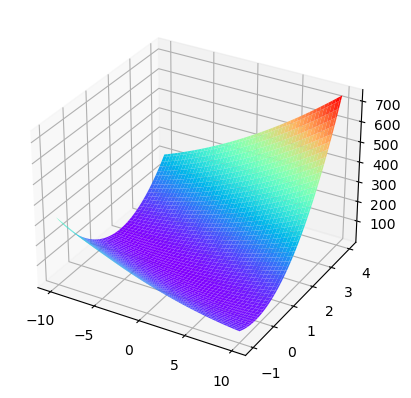

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(X, Y, J_vals.T, cmap='rainbow', edgecolor='none')

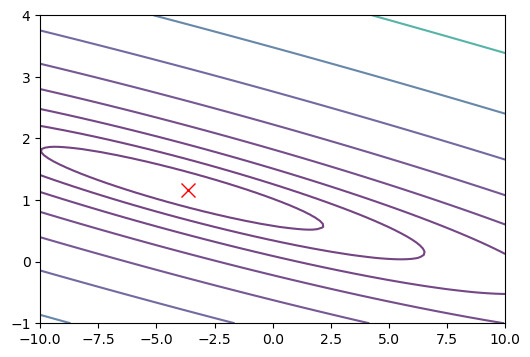

In [16]:
fig2, ax = plt.subplots(figsize=(6, 4))
ax.contour(X, Y, J_vals.T, 8, alpha=0.75, levels=np.logspace(-2, 3, 20))
ax.plot(theta[0, 0], theta[1, 0], 'rx', markersize=10)
plt.show()

In [17]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2, np.newaxis]
m = len(y)

In [18]:
def featureNormalize(X):
	mu = np.zeros((1, np.size(X, 1)))
	sigma = np.zeros((1, np.size(X, 1)))

	mu = np.mean(X, 0)
	sigma = np.std(X, 0)
	X_norm = (X - mu) / sigma

	return X_norm, mu, sigma

In [19]:
X, mu, sigma = featureNormalize(X)

In [20]:
X = np.concatenate((np.ones((m, 1)), X), axis=1)

In [21]:
def computeCostMulti(X, y, theta):
	m = len(y)
	J = (X @ theta - y).T @ (X @ theta - y)
	return J

In [22]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
	m = len(y)
	J_history = np.zeros((num_iters, 1))

	for iter in range(num_iters):
		h = X @ theta
		temp = np.zeros((len(theta), 1))
		for x in range(len(theta)):
			temp[x, 0] = theta[x, 0] - alpha / m * np.sum((h - y) * X[:, x, np.newaxis])

		for x in range(len(theta)):
			theta[x, 0] = temp[x, 0]

		J_history[iter] = computeCostMulti(X, y, theta)

	return theta, J_history

In [23]:
alpha = 0.1
num_iters = 400

theta = np.zeros((3, 1))
theta, cost = gradientDescentMulti(X, y, theta, alpha, num_iters)

print('Theta computed from gradient descent: \n{0}\n{1}\n{2}'.format(*theta[0], *theta[1], *theta[2]))

Theta computed from gradient descent: 
340412.65957446786
109447.79558638527
-6578.353970904728


In [24]:
price = [1, 1650, 3] @ theta

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n{}'.format(*price))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
180909540.31519747


In [25]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2, np.newaxis]
m = len(y)

X = np.concatenate((np.ones((m, 1)), X), axis=1)

In [26]:
def normalEqn(X, y):
	theta = np.zeros((np.size(X, 1), 1))

	theta = np.linalg.pinv(X.T @ X) @ X.T @ y

	return theta

In [27]:
theta = normalEqn(X, y)

print('Theta computed from the normal equations:\n{}\n{}\n{}'.format(*theta[0],*theta[1],*theta[2]))

Theta computed from the normal equations:
89597.90954360693
139.21067401759794
-8738.019112551454
